In [1]:
import pandas as pd


def human_format(num):
    num = float('{:.3g}'.format(num))
    magnitude = 0
    while abs(num) >= 1000:
        magnitude += 1
        num /= 1000.0
    return '{}{}'.format('{:f}'.format(num).rstrip('0').rstrip('.'), ['', 'K', 'M', 'B', 'T'][magnitude])

# column in csv
column = 'income_lic'
columns = ['abc_class','revenue_total']

df = pd.read_csv('fns_for_model.csv', delimiter=';')

In [8]:
def abc_classify_product(percentage):
    """Apply an ABC classification to each product based on 
    its ranked percentage revenue contribution. Any split 
    can be used to suit your data. 

    :param percentage: Running percentage of revenue contributed
    :return: ABC inventory classification
    """

    if percentage > 0 and percentage <= 80:
        return 'A'
    elif percentage > 80 and percentage <= 95:
        return 'B'
    else:
        return 'C'

In [9]:
df_skus = df[(df['year'] == 2021) & (df['quarter'] == 3)]
#income_sum = df_income[column].sum()#
df_skus['revenue_cumsum'] = df_skus[column].cumsum()
df_skus['revenue_total'] = df_skus[column].sum()
df_skus['revenue_running_percentage'] = (df_skus['revenue_cumsum'] / df_skus['revenue_total']) * 100
df2 = df_skus.sort_values(by='revenue_total', ascending=False)
df2['income_hr'] = df2[column].apply(lambda val: human_format(val))

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row

In [10]:
df2['abc_class'] = df2['revenue_running_percentage'].apply(abc_classify_product)

In [11]:
import numpy as np

data = df2[columns]

In [ ]:
# import pandas as pd
# import plotly.graph_objects as go




# fig = go.Figure([go.Bar(x=data['abc_class'], y=data['revenue_total'], yaxis='y1', name='count'),
#                      go.Scatter(x=data['abc_class'], y=data['revenue_total']/len(df2[column]), yaxis='y2', name='cumulative ratio',
#                                 hovertemplate='%{y:.1%}', marker={'color': '#000000'})])

# fig.update_layout(template='plotly_white', showlegend=False, hovermode='x', bargap=.3,
#                       title={'text': 'Pareto revenue_total', 'x': .5}, 
#                       yaxis={'title': 'revenue total Company'},
#                       yaxis2={'rangemode': "tozero", 'overlaying': 'y',
#                               'position': 1, 'side': 'right',
#                               'tickvals': np.arange(0, 1.1, .2),
#                               'tickmode': 'array',
#                               'ticktext': [str(i) + '%' for i in range(0, 101, 20)]})
# fig.show()
#fig.write_html("pareto total.html")
#fig.write_image("pareto total.svg")

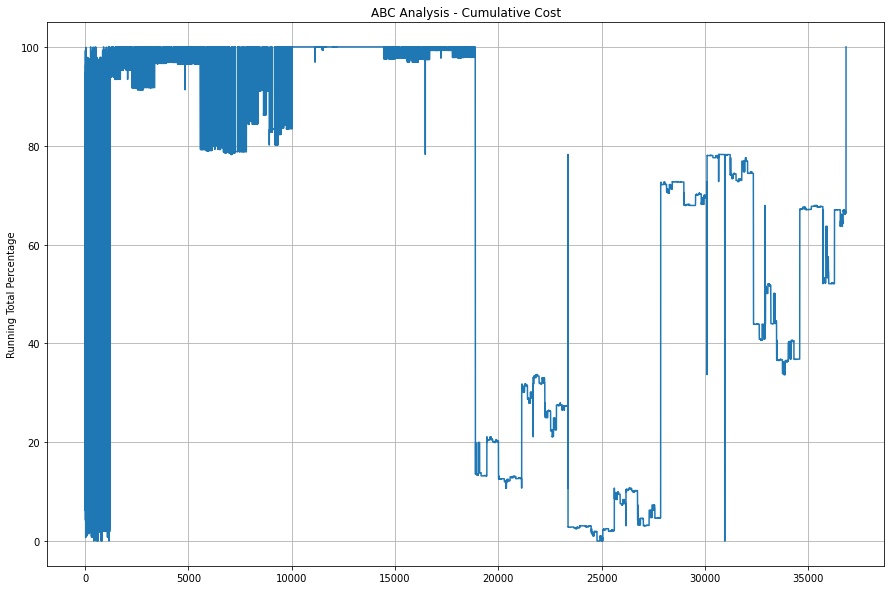

In [18]:
import matplotlib.pyplot as plt 
import seaborn as sns


f, ax = plt.subplots(figsize=(15, 10))
performance = df2['revenue_running_percentage'].tolist()
y_pos = np.arange(len(performance))

plt.plot(y_pos,performance)
plt.ylabel('Running Total Percentage')
plt.title('ABC Analysis - Cumulative Cost')
plt.grid(True)
plt.show()